># Universidad Autónoma de Aguascalientes
>## *Ingeniería en Computación Inteligente*
>#### Materia:
>Inteligencia Artificial
>#### Topico: 
>Búsqueda no Informada: _Hill Climbing_
>#### Integrantes del Equipo:
>- Juan Francisco Gallo Ramírez
>- José Alfredo Díaz Robledo
>- Luis Palbo Esparza Terrones
>- Luis Manuel Flores Jiménez 
>#### Maestro: 
>Dr. Francisco Javier Luna Rosas
>#### Fecha: 
>Noviembre del 2023

# Hill Climbing

- Importamos las librerías necesarias.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

- Creamos nuesttro grafo.

In [2]:
G = nx.Graph()

- Añadimos todos nuestros nodos, en este caso representan ciudades de EUA.

In [3]:
G.add_node("IFalls");
G.add_node("GForks");
G.add_node("Bemindji");
G.add_node("Duluth");
G.add_node("Fargo");
G.add_node("StCloud");
G.add_node("Minneapolis");
G.add_node("Wausau");
G.add_node("GBay");
G.add_node("LCrosse");
G.add_node("Rochester");
G.add_node("SFalls");
G.add_node("Madison");
G.add_node("Milwaukee");
G.add_node("Dubuque");
G.add_node("Rockford");
G.add_node("Chicago");

- Añadimos todas las aristas de los nodos.

In [4]:
G.add_edge("IFalls", "GForks", weight=80)
G.add_edge("IFalls", "Bemindji", weight=60)
G.add_edge("IFalls", "Duluth", weight=65)
G.add_edge("GForks", "Bemindji", weight=70)
G.add_edge("GForks", "Fargo", weight=50)
G.add_edge("Bemindji", "Duluth", weight=55)
G.add_edge("Bemindji", "StCloud", weight=65)
G.add_edge("Duluth", "Minneapolis", weight=70)
G.add_edge("Fargo", "StCloud", weight=78)
G.add_edge("Fargo", "SFalls", weight=130)
G.add_edge("StCloud", "Minneapolis", weight=30)
G.add_edge("Minneapolis", "Wausau", weight=75)
G.add_edge("Minneapolis", "LCrosse", weight=70)
G.add_edge("Minneapolis", "Rochester", weight=68)
G.add_edge("Wausau", "GBay", weight=60)
G.add_edge("GBay", "LCrosse", weight=72)
G.add_edge("GBay", "Milwaukee", weight=70)
G.add_edge("LCrosse", "Rochester", weight=20)
G.add_edge("LCrosse", "Madison", weight=35)
G.add_edge("LCrosse", "Dubuque", weight=38)
G.add_edge("Rochester", "SFalls", weight=125)
G.add_edge("Rochester", "Dubuque", weight=40)
G.add_edge("Madison", "Milwaukee", weight=37)
G.add_edge("Madison", "Rockford", weight=35)
G.add_edge("Dubuque", "Rockford", weight=38)
G.add_edge("Milwaukee", "Chicago", weight=37)
G.add_edge("Rockford", "Chicago", weight=33)

- Imprimimos el grafo.

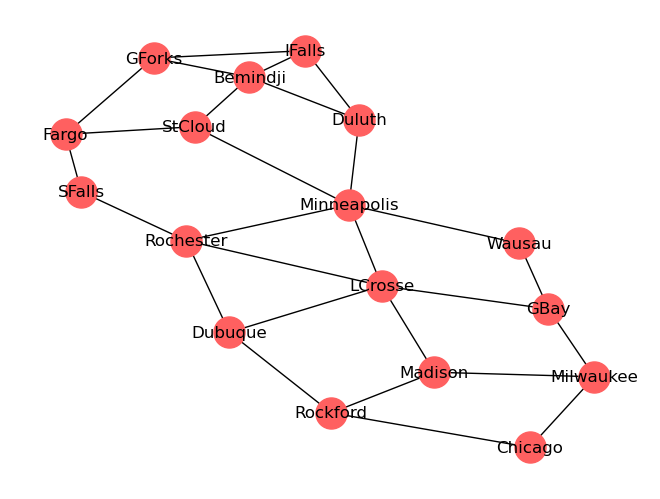

In [5]:
nx.draw(G, with_labels=True, node_size=500, node_color="#FF6060", font_size=12, font_color="black")
plt.show()

- Función para la búsqueda Hill Climbing.

In [6]:
# Función para calcular el costo total de una ruta.
def calculate_cost(route, graph):
    cost = 0
    for i in range(len(route) - 1):
        # Suma el peso de la arista entre dos nodos consecutivos en la ruta.
        cost += graph[route[i]][route[i + 1]]["weight"]
    return cost

# Algoritmo de escalada en la colina.
def hill_climbing(graph, initial_node, destination_node):
    current_solution = [initial_node]
    current_cost = 0

    # Mientras no lleguemos al nodo de destino.
    while current_solution[-1] != destination_node:
        # Obtiene los nodos vecinos del último nodo en la solución actual.
        neighbors = list(graph.neighbors(current_solution[-1]))
        # Inicializa la mejor opción de vecino como None.
        best_neighbor = None
        # Inicializa el mejor costo como infinito positivo.
        best_cost = float("inf")

        for neighbor in neighbors:
            # Si el vecino no está en la solución actual.
            if neighbor not in current_solution:
                # Crea una nueva ruta agregando el vecino.
                route = current_solution + [neighbor]
                # Calcula el costo de la nueva ruta.
                cost = calculate_cost(route, graph)
                # Si la nueva ruta es mejor que la mejor ruta conocida.
                if cost < best_cost:
                    # Actualiza el mejor vecino y mejor costo.
                    best_neighbor = neighbor
                    best_cost = cost
                    
        # Si no se encuentra un mejor vecino.
        if best_neighbor is None:
            break

        current_solution.append(best_neighbor)
        current_cost = best_cost
        
    # Devuelve la mejor ruta y su costo.
    return current_solution, current_cost

- Recorremos el grafo desde "Rochester" hasta "Chicago".

In [7]:
initial_node = "IFalls"
destination_node = "Chicago"
best_route, best_cost = hill_climbing(G, initial_node, destination_node)

- Imprimimos los resultados.

In [8]:
print(">> Mejor ruta:\n")
print(best_route)
print("\n>> Costo de la mejor ruta:\n")
print(best_cost)

>> Mejor ruta:

['IFalls', 'Bemindji', 'Duluth', 'Minneapolis', 'StCloud', 'Fargo', 'GForks']

>> Costo de la mejor ruta:

343
